<a href="https://colab.research.google.com/github/Bouza1/breast_cancer_classification/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
# Data and Datasets
import pandas as pd
import numpy as np

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Current Machine Learning Workflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   radius_mean              550 non-null    float64
 2   texture_mean             568 non-null    float64
 3   perimter_mean            567 non-null    float64
 4   area_mean                566 non-null    float64
 5   smoothness_mean          567 non-null    float64
 6   compactness_mean         566 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            566 non-null    float64
 10  fractal_dimension_mean   567 non-null    float64
 11  radius_error             551 non-null    float64
 12  texture_error            567 non-null    float64
 13  perimeter_error          568 non-null    float64
 14  area_error               5

In [6]:
# Dropping all rows with missing values
df = df.dropna()

# Converting all non-numeric (object) features to numeric
cat_columns = df.select_dtypes(['object']).columns
df.loc[:, cat_columns] = df.loc[:, cat_columns].astype('category') # converting 'object' columns to 'category' type
df.loc[:, cat_columns] = df.loc[:, cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:-1]  # Using -1 instead of len(df.columns)-1
y = df.iloc[:,-1]    # Using -1 instead of len(df.columns)-1

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

In [7]:
# Creating and testing a Logistic Regression Model
model = LogisticRegression()
# Training the model
model.fit(X_train, y_train)
# Testing the model
y_pred = model.predict(X_test)
# Printing out performance of the model
print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 55.04587155963303


# Critical Evaluation of the CMLW

# 1.   Data Preprocessing
## 1.1.   Feature Vector

The approach taken in the CMLW is to split the dataset as follows, Columns 0-30 (Figure 1) form the feature vector and Column 31 (class) becomes the target variable leading to a model classifying breast mass tumours based on a patient ID (Column 0). It is basic intuition that a patient’s ID would play no role in the classification of a breast mass tumour but for further clarification see the correlation chart, Figure 2.

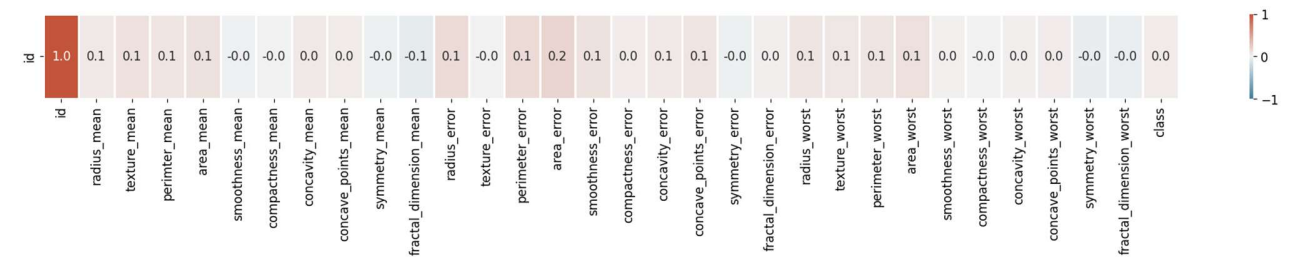

The inclusion of redundant variables not only hampers the overall accuracy of machine learning workflows but can also increase computational time.

## 1.2.   Non-Normalization of Data
In regression-based machine learning, greater numerical features tend to play more significant roles in predicting the target variable. As per Appendix D, we can see the mean value per column ranges from 879.487 – 0.003. As such, irrespective of the correlation between feature variables and the target variable, feature variables of a higher numerical value are likely to be given more weight within the model because of the lack of ‘transformation of features in a common range so that greater numeric feature values cannot dominate the smaller numeric features values’ as stipulated by Singh & Singh, 2020.


# 1.3.   Drop_NA()

The approach taken to drop all rows (drop_na(), pandas library) containing one or more non-numerical values (NaNs) leads to a 4.39% loss of valuable data (25 rows). As per Figure 3, only three of the twenty-five rows would be deemed worthy of removal, where “more than 15%” of values missing “may severely impact
any kind of interpretation” as noted by Acuña & Rodriguez, 2004, when dealing with missing values in classifier accuracy.

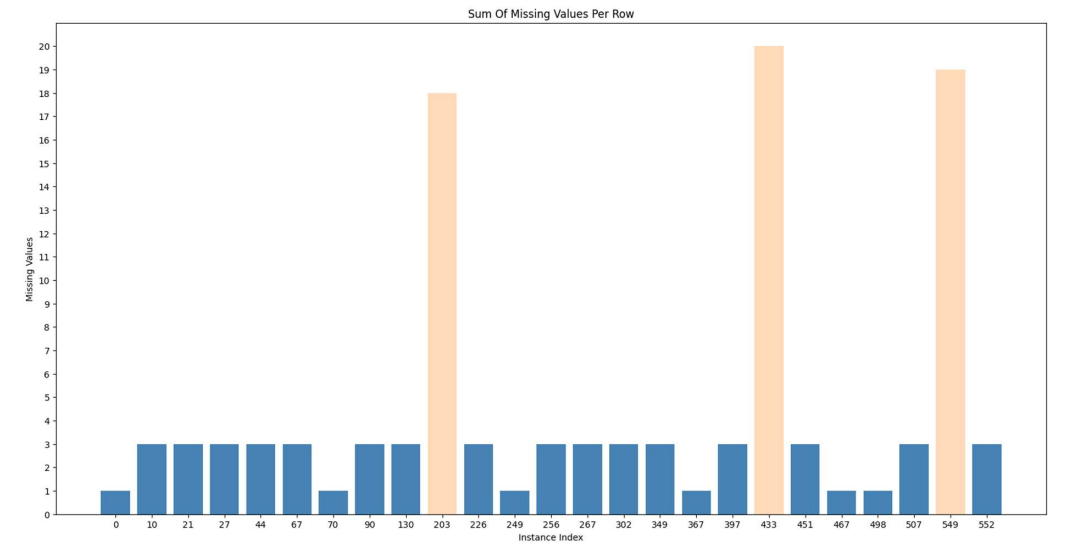

Furthermore, as per Figure 4, the approach taken cannot recognize zero as a missing value, leading to the model being trained on thirteen records each with a zero for six of the feature variables.

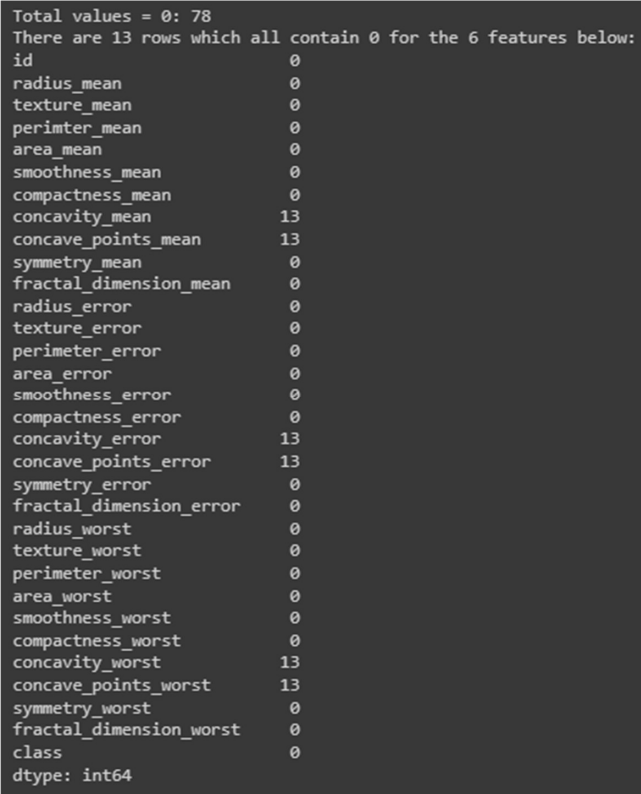



 ## 1.4.   Class Imbalance

As depicted in Figure 5, the dataset exhibits a class imbalance. Benign tumours (63%) constitute the majority class with Malignant tumours (37%) becoming the minority class.

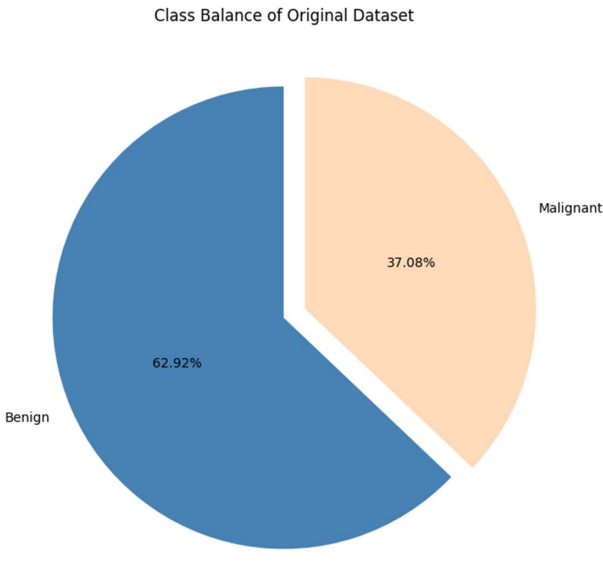

The failure of the current workflow to address this imbalance has undoubtedly led to a bias of the model
towards the majority class of benign, which is prevalent in the confusion matrix below, Figure 6.

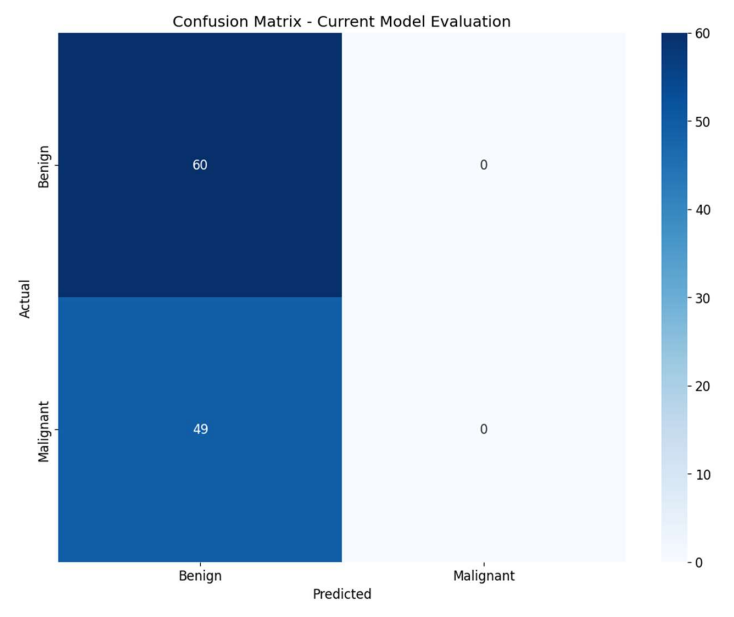

The implications of a class imbalance presented by Gu et al., 2008, “standard classifiers tend to be overwhelmed the large classes and ignore the small ones” are corroborated by the CMLW’s ability to misclassified 49 Malignant tumours as Benign.

# 2.   Model Selection

One of the few merited decisions taken in CMLW is the choice of a logistic regression model. Logistic regression is well-suited for binary classification especially within the breast cancer diagnosis domain as noted by Sultana et al., 2018 “Results indicate that Simple Logistic regression obtained best performance in general compared to the other classifiers” when comparing classifiers on breast cancer datasets.

# 3.   Validation Metric

The validation of the model only adds to the complete failures of the CMLW. The only measurement given is that of the accuracy score (Equation B), expressed as a percentage (55.0456%). The accuracy score is a poor measure of a model's performance when there is a class imbalance as it is easily influenced by the model's performance on the majority class, as is the case with the CMLW. A more important metric in the realms of breast cancer diagnosis is the recall score, the rate at which the model is classifying Malignant tumours as Benign which could inadvertently lead to fatalities.

# 4.   Conclusion
Conclusively the CMLW fails at all aspects of being a breast mass tumour classifier. In a real-world domain, the overwhelming bias towards benign tumours, will lead to high false positives as seen in figure 6, and
inevitably fatalities. The failures of the CMLW not only provide great insights into the importance of data preprocessing but also serve as a reminder of the stark consequences a biased model can carry.